In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

### 카이제곱분포

$Y = \displaystyle\sum_{i=1}^{n}{Z_i^2}$

- $Z_1, Z_2, Z_3, ..., Z_n$이 서로 독립이고 $N(0,1)$을 따르고 있을 때의 그 제곱합의 확률분포를<br>자유도가 n인 카이제곱분포라 칭한다.
- 카이제곱분포는 분산의 구간 추정이나 독립성 검정에서 사용되는 확률분포이다.
- 좌우 비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어지는 모양이다.
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도의 값 가까이에 분포의 정점이 있다.

카이제곱은 변수의 독립성을 먼저 확인할 때 사용한다고 합니다. 책 331,332쪽 읽어보시면 예시가 나옵니다!
https://www.jmp.com/ko_kr/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html


In [6]:
# 표본 크기 10으로 백만번 무작위 추출하여 카이제곱분포를 따르는 표본 데이터 만들기
n = 10 # 표본크기가 곧 자유도
rv = stats.norm()
Z_sample = rv.rvs((n,1000000)) # (10,1000000) 2차원 배열
display(Z_sample)
chi_sample = np.sum(Z_sample**2,axis=0) # 행방향 z 제곱의 합

array([[ 0.50020141, -0.77175112,  0.19769257, ..., -0.10144417,
        -1.09268951,  0.66761575],
       [ 0.54183886,  0.20123888,  0.79748308, ...,  2.37847485,
        -1.32344357, -0.21162366],
       [ 0.6799597 , -1.83609726, -2.41631099, ..., -1.61544641,
         0.15140058,  0.06818424],
       ...,
       [ 0.83881728,  1.18489796, -0.85809428, ...,  1.46029881,
         0.15266718, -0.48623812],
       [ 0.94597312, -0.29628107,  0.58978027, ..., -1.48974731,
        -0.58316386, -0.19675833],
       [ 0.34548705,  0.62456495,  1.79896199, ...,  1.10897848,
         0.24992858, -0.83976902]])

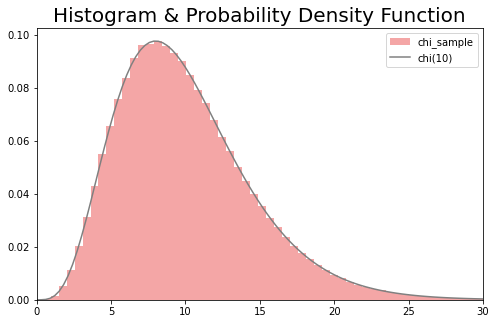

In [36]:
# 표본 데이터의 히스토그램과 밀도함수를 시각화

plt.figure(figsize=(8,5))
chi = stats.chi2(n)
xrange = np.linspace(0,30,100)

plt.hist(chi_sample, bins=100, density=True, # 밀도함수이니까 density on!
         label='chi_sample',color = 'lightcoral', alpha=0.7)
plt.plot(xrange, chi.pdf(xrange), label = f'chi({n})',color='gray')
plt.xlim(0,30)
plt.legend()
plt.title('Histogram & Probability Density Function',fontsize=20)
plt.show()

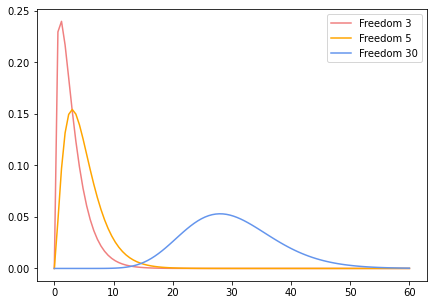

In [111]:
# 자유도 변화에 따른 카이제곱 분포의 변화
# 자유도를 3,5,10으로 변화시켜보자.

color = ['lightcoral','orange','cornflowerblue']
freedom = [3,5,30]

plt.figure(figsize=(7,5))
xrange = np.linspace(0,60,100)
for i, j in zip(freedom, color):
    chi = stats.chi2(i)
    plt.plot(xrange, chi.pdf(xrange), color=j, label=f'Freedom {i}')
plt.legend()
plt.show()
# 자유도(독립변수의 개수)가 커질수록 자유대칭 형태에 가까워진다.

In [47]:
# 자유도 n = 5, 상위 5%
chi = stats.chi2(5)
chi.isf(0.05)

11.070497693516355

## t 분포

$t = \frac {Z} {\sqrt{Y/n}}$

- 정규분포에서는 모평균의 구간 추정 등에 사용되는 확률분포
- 확률변수 $Z, Y$는 서로 독립이고, $Z$는 표준정규분포 $N(0,1)$을 따르고,<br>$Y$는 자유도가 $n$인 카이제곱분포 $\chi^2(n)$를 따를 때<br>$t = \frac {Z} {\sqrt{Y/n}}$의 확률분포를 자유도가 $n$인 $t$ 분포라고 한다.
<br><br>

- t 분포의 의미
    * 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 얘기할 수 있다.
    * t 분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화한다.
    * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가<br>t 분포를 따른다는 사실을 이용하면, 얻어진 표본평균에 대한 불확실성을 짐작할 수 있다.
- t 분포의 특성
    * t 분포는, 분산 $\sigma^2$이 알려지지 않은 정규분포 모집단에서 표본의 수가 적은 경우에도<br>평균 $\mu$에 대한 신뢰구간 추정 및 가설 검정에 아주 유용하게 쓰이는 분포이다.
    * t 분포는 표준정규분포처럼 0을 중심으로 종 모양을 지닌 대칭 분포이다.
    * t 분포의 꼬리는 표준정규분포보다 두껍다. (fat tail)
    * t 분포는 자유도 n에 따라 그 모습이 변하는데, 자유도 n이 커지면 표준정규분포 N(0,1)에 수렴한다.<br>통상 모집단의 분산이 알려져 있지 않은 상황에서 표본분포를 결정할 때,<br>표본의 크기가 30 이하이면 t 분포를, 그 크기가 30 이상이면 표준정규분포를 이용한다

모분산을 모르는(알 수 없는), 또는 표본의 수량이 30개 이하일 경우 t 분포를 쓰면 된다.<br><br>
표준 오차 (또는 평균 표준 오차)<br>

    표본 평균에 대한 표준편차이다. 오차 용어를 사용하는 이유는 표준 오차 공식에서, 표본 평균의 평균값 k를 참값으로 간주하고 표본 평균과의 차이인 오차 개념이 적용되기 때문이다

In [61]:
# 표본 개수 10(=자유도)인 t 분포를 만들어 보자.
n=10
rv1 = stats.norm()
rv2 = stats.chi2(n)

Z = rv1.rvs(1000000)
chi2 = rv2.rvs(1000000)
T = Z/np.sqrt(chi2/n)

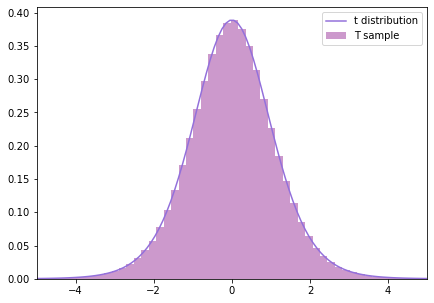

In [69]:
# 시각화 해볼까용~
plt.figure(figsize=(7,5))
xrange = np.linspace(-5,5,100)
plt.plot(xrange, stats.t(n).pdf(xrange),
         color = 'mediumpurple',label='t distribution')
plt.hist(T, bins=100, density=True,color='purple', alpha=0.4, label='T sample')
plt.legend()
plt.xlim(-5,5)
plt.show()

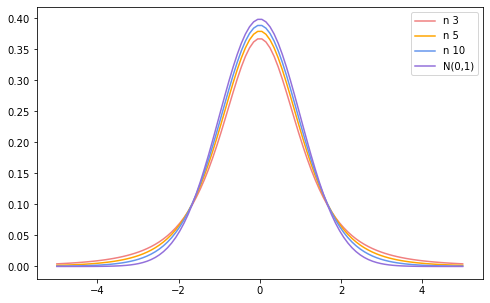

In [86]:
# 자유도를 3, 5, 10으로 변화시킬때의 경우를 시각화하세용

color = ['lightcoral','orange','cornflowerblue']
freedom = [3,5,10]
plt.figure(figsize=(8,5))
xrange = np.linspace(-5,5,100)
for i,color in zip(freedom, color):
    plt.plot(xrange, stats.t(i).pdf(xrange), color=color,
            label = f'n {i}')
plt.plot(xrange,stats.norm().pdf(xrange), color='mediumpurple', label='N(0,1)')
plt.legend()
plt.show()
# 정규분포 그래프보다 끝꼬리가 쪼끔 더 통통하게 나오는 것을 볼 수 있다.

In [85]:
# [연습문제] 자유도가 5인 t분포의 상위 5%
display(stats.t(5).isf(0.05),
        stats.t(5).ppf(0.95),
       1-stats.t(5).cdf(2.015048372669157))

2.0150483726691575

2.015048372669157

0.05000000004235261

## F 분포
- 확률변수 $Y_1, Y_2$는 서로 독립이고, $Y_1\sim\chi^2(n_1),Y_2\sim\chi^2(n_2)$를 따를 때,<br>$F = \frac {Y_1/n_1}{Y_2/n_2}$의 확률분포를 자유도가 $n_1, n_2$인 F 분포 $F(n_1,n_2)$라고 한다.
- 좌우 비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F 분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.

In [87]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample1 = rv1.rvs(100000)
sample2 = rv2.rvs(100000)

f_sample = (sample1/n1)/(sample2/n2)

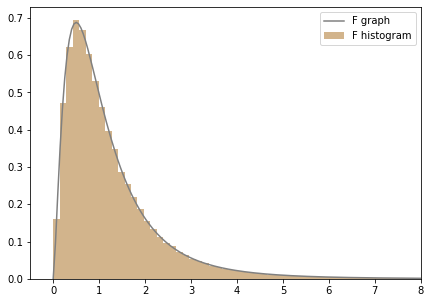

In [98]:
# 히스토그램과 확률밀도함수 그래프~

plt.figure(figsize=(7,5))
xrange = np.linspace(0,10,200)
plt.plot(xrange, stats.f(n1,n2).pdf(xrange),label='F graph',color = 'gray')
plt.hist(f_sample, bins=200,density=True, label='F histogram',color = 'tan')
plt.legend()
plt.xlim(-.5,8)
plt.show()

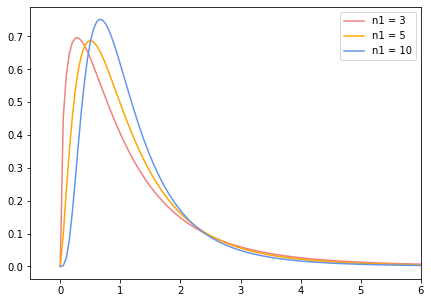

In [103]:
# 자유도 n2가 10으로 고정일 때 n1의 변화가 3,5,10인 그래프도 그려보자
color = ['lightcoral','orange','cornflowerblue']
freedom = [3,5,10]
n2 = 10

xrange = np.linspace(0,10,200)
plt.figure(figsize=(7,5))
for i, color in zip(freedom, color):
    plt.plot(xrange, stats.f(i,n2).pdf(xrange),color=color,
             label=f'n1 = {i}')
plt.legend()
plt.xlim(-.5,6)
plt.show()
# 첫번째 카이제곱분포의 자유도 n1이 커지면 그래프는 오른쪽으로 퍼진다.

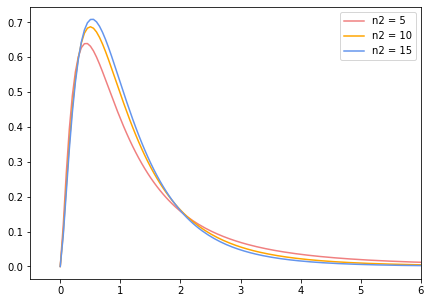

In [104]:
# 자유도 n1이 5로 고정일 때 n2의 변화가 5, 10, 15인 그래프도 그려보자
color = ['lightcoral','orange','cornflowerblue']
freedom = [5, 10, 15]
n1 = 5
xrange = np.linspace(0,10,200)
plt.figure(figsize=(7,5))
for i, color in zip(freedom,color):
    plt.plot(xrange, stats.f(n1,i).pdf(xrange),color=color,
            label=f'n2 = {i}')
plt.xlim(-.5,6)
plt.legend()
plt.show()
# 두 번째 카이제곱분포의 자유도 n2가 커지면 그래프는 위로 솟아오른다.